#**New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [19]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [21]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [22]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [27]:
# Try loading one file
# df = pd.read_parquet('2023-1.parquet')
df = pd.read_parquet(r"C:\Users\jaina\OneDrive\Desktop\Datasets and Dictionary\trip_records\2023-1.parquet")
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [34]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [38]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"C:\Users\jaina\OneDrive\Desktop\Yash\Datasets and Dictionary\trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"Processing {file_name}...")
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])
        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour
        
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['date'].unique():
            date_df = month_df[month_df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_df[date_df['hour'] == hour]

                if not hour_data.empty:
                # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing 2023-1.parquet...
Processing 2023-10.parquet...
Processing 2023-11.parquet...
Processing 2023-12.parquet...
Processing 2023-2.parquet...
Processing 2023-3.parquet...
Processing 2023-4.parquet...
Processing 2023-5.parquet...
Processing 2023-6.parquet...
Processing 2023-7.parquet...
Processing 2023-8.parquet...
Processing 2023-9.parquet...


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [40]:
# Store the df in csv/parquet
if len(df) > 300000:
    df = df.sample(n=250000, random_state=42).reset_index(drop=True)
    
df.to_csv("Final_nyc_taxi.csv", index=False)

# df.to_parquet('')
print("Final dataset shape:", df.shape)

Final dataset shape: (250000, 22)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [45]:
# Load the new data file
df = pd.read_csv("Final_nyc_taxi.csv")


In [47]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-11 00:14:14   2023-11-11 00:23:06              1.0   
1         2  2023-04-02 12:43:34   2023-04-02 13:03:45              1.0   
2         1  2023-05-30 15:33:50   2023-05-30 16:01:40              1.0   
3         2  2023-04-05 21:15:46   2023-04-05 21:27:42              1.0   
4         2  2023-12-06 22:16:09   2023-12-06 22:46:09              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.99         1.0                  N           114           148   
1           3.88         1.0                  N           162           125   
2           0.00        99.0                  N            74           137   
3           2.04         1.0                  N           142           233   
4           5.59         NaN                NaN           231           239   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.00           0.0   
1             1  ...      0.5        5.32           0.0   
2             1  ...      0.5        0.00           0.0   
3             1  ...      0.5        2.00           0.0   
4             0  ...      0.5        5.34           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.00                   2.5          NaN   
1                    1.0         31.92                   2.5          NaN   
2                    1.0         28.00                   0.0          NaN   
3                    1.0         19.80                   2.5          NaN   
4                    1.0         40.96                   NaN          NaN   

         date  hour Airport_fee  
0  2023-11-11     0         0.0  
1  2023-04-02    12         0.0  
2  2023-05-30    15         0.0  
3  2023-04-05    21         0.0  
4  2023-12-06    22         NaN  

[5 rows x 22 columns]

In [49]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               250000 non-null  int64  
 1   tpep_pickup_datetime   250000 non-null  object 
 2   tpep_dropoff_datetime  250000 non-null  object 
 3   passenger_count        241519 non-null  float64
 4   trip_distance          250000 non-null  float64
 5   RatecodeID             241519 non-null  float64
 6   store_and_fwd_flag     241519 non-null  object 
 7   PULocationID           250000 non-null  int64  
 8   DOLocationID           250000 non-null  int64  
 9   payment_type           250000 non-null  int64  
 10  fare_amount            250000 non-null  float64
 11  extra                  250000 non-null  float64
 12  mta_tax                250000 non-null  float64
 13  tip_amount             250000 non-null  float64
 14  tolls_amount           250000 non-nu

In [51]:
print(df.nunique().sort_values())

airport_fee                   2
store_and_fwd_flag            2
VendorID                      3
congestion_surcharge          3
Airport_fee                   3
improvement_surcharge         4
payment_type                  5
mta_tax                       5
RatecodeID                    6
passenger_count               9
hour                         24
extra                        38
PULocationID                236
DOLocationID                256
tolls_amount                259
date                        366
tip_amount                 2536
trip_distance              2899
fare_amount                3752
total_amount               8871
tpep_pickup_datetime     237536
tpep_dropoff_datetime    237541
dtype: int64


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [55]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)

In [57]:
df = df.drop('store_and_fwd_flag', axis=1)
df = df.drop('hour', axis=1)
df = df.drop('date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               250000 non-null  int64  
 1   tpep_pickup_datetime   250000 non-null  object 
 2   tpep_dropoff_datetime  250000 non-null  object 
 3   passenger_count        241519 non-null  float64
 4   trip_distance          250000 non-null  float64
 5   RatecodeID             241519 non-null  float64
 6   PULocationID           250000 non-null  int64  
 7   DOLocationID           250000 non-null  int64  
 8   payment_type           250000 non-null  int64  
 9   fare_amount            250000 non-null  float64
 10  extra                  250000 non-null  float64
 11  mta_tax                250000 non-null  float64
 12  tip_amount             250000 non-null  float64
 13  tolls_amount           250000 non-null  float64
 14  improvement_surcharge  250000 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [60]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
df.drop(columns=['Airport_fee'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               250000 non-null  int64  
 1   tpep_pickup_datetime   250000 non-null  object 
 2   tpep_dropoff_datetime  250000 non-null  object 
 3   passenger_count        241519 non-null  float64
 4   trip_distance          250000 non-null  float64
 5   RatecodeID             241519 non-null  float64
 6   PULocationID           250000 non-null  int64  
 7   DOLocationID           250000 non-null  int64  
 8   payment_type           250000 non-null  int64  
 9   fare_amount            250000 non-null  float64
 10  extra                  250000 non-null  float64
 11  mta_tax                250000 non-null  float64
 12  tip_amount             250000 non-null  float64
 13  tolls_amount           250000 non-null  float64
 14  improvement_surcharge  250000 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [63]:
# check where values of fare amount are negative
df['negative_fare'] = df['fare_amount'] < 0
df['negative_fare'].value_counts()

negative_fare
False    250000
Name: count, dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [66]:
# Analyse RatecodeID for the negative fare amounts
df.groupby('RatecodeID')['fare_amount'].describe()

count        mean        std   min   25%   50%      75%    max
RatecodeID                                                                   
1.0         227999.0   16.976308  12.607467   0.0   9.3  12.8   19.800  220.7
2.0           9585.0   69.943119   2.027257   0.0  70.0  70.0   70.000   84.8
3.0            782.0   89.626215  28.064722  23.0  83.2  90.2   98.600  206.4
4.0            548.0  105.635219  68.797606   0.0  59.7  91.9  138.275  637.9
5.0           1296.0   72.498017  59.112235   0.0  27.0  70.0   87.690  640.0
99.0          1309.0   33.712108  18.588966   0.0  20.5  30.5   43.500  425.0

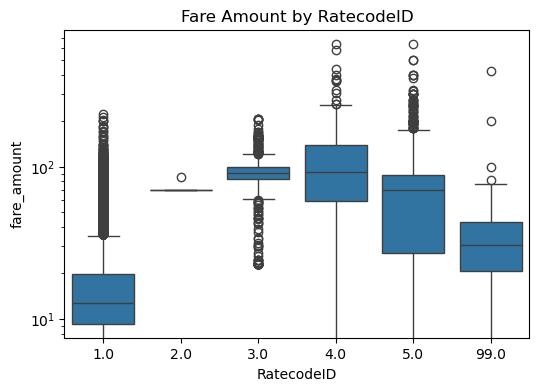

In [68]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='RatecodeID', y='fare_amount', data=df)
plt.title('Fare Amount by RatecodeID')
plt.yscale('log')
plt.show()

In [69]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include=['float64', 'int64'])
negative_values_columns = numeric_df.columns[(numeric_df < 0).any()]
print("Columns with negative values:", negative_values_columns.tolist())

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']


In [72]:
# fix these negative values
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].clip(lower=0)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [77]:
# Find the proportion of missing values in each column
proportion_of_missing_values = df.isnull().mean()
proportion_of_missing_values

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033924
trip_distance            0.000000
RatecodeID               0.033924
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033924
airport_fee              0.033924
negative_fare            0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [80]:
# Display the rows with null values
df[df['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-12-06 22:16:09   2023-12-06 22:46:09              NaN   
51             1  2023-05-11 16:20:20   2023-05-11 16:29:42              NaN   
115            2  2023-04-03 07:00:00   2023-04-03 07:09:00              NaN   
154            2  2023-10-17 07:54:16   2023-10-17 08:21:28              NaN   
181            2  2023-02-28 08:54:00   2023-02-28 09:09:00              NaN   
...          ...                  ...                   ...              ...   
249749         2  2023-01-04 13:32:16   2023-01-04 13:38:09              NaN   
249751         1  2023-10-27 23:22:23   2023-10-27 23:46:24              NaN   
249855         2  2023-06-24 23:36:08   2023-06-25 00:02:05              NaN   
249884         1  2023-09-27 15:48:34   2023-09-27 15:53:17              NaN   
249918         2  2023-07-18 22:31:52   2023-07-18 22:51:10              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                5.59         NaN           231           239             0   
51               0.50         NaN           162           237             0   
115              2.03         NaN           239           163             0   
154              3.06         NaN           229           238             0   
181              2.91         NaN           262           163             0   
...               ...         ...           ...           ...           ...   
249749           0.72         NaN           239           142             0   
249751           0.00         NaN           231           163             0   
249855           4.22         NaN            80           189             0   
249884           0.70         NaN           141           262             0   
249918           5.25         NaN           144            43             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4             31.62    0.0      0.5        5.34           0.0   
51             9.30    2.5      0.5        2.37           0.0   
115           12.53    0.0      0.5        3.31           0.0   
154           29.28    0.0      0.5        2.00           0.0   
181           16.90    0.0      0.5        4.18           0.0   
...             ...    ...      ...         ...           ...   
249749        12.02    0.0      0.5        3.20           0.0   
249751        26.87    0.0      0.5        0.00           0.0   
249855        22.89    0.0      0.5        0.00           0.0   
249884         6.50    0.0      0.5        2.10           0.0   
249918        32.28    0.0      0.5        5.44           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
4                         1.0         40.96                   NaN   
51                        1.0         18.17                   NaN   
115                       1.0         19.84                   NaN   
154                       1.0         35.28                   NaN   
181                       1.0         25.08                   NaN   
...                       ...           ...                   ...   
249749                    1.0         19.22                   NaN   
249751                    1.0         30.87                   NaN   
249855                    1.0         24.39                   NaN   
249884                    1.0         12.60                   NaN   
249918                    1.0         41.72                   NaN   

        airport_fee  negative_fare  
4               NaN          False  
51              NaN          False  
115             NaN          False  
154             NaN          False  
181             NaN          False  
...             ...            ...  
249749          NaN          False  
249751          NaN          False  
249855          NaN          False  
249884          NaN          False  
249918          NaN          False  

[8481 rows x 19 columns]

In [82]:
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()[0])
df['passenger_count'].isna().sum()

0

Did you find zeroes in passenger_count? Handle these.

In [85]:
zero_count = df[df['passenger_count'] == 0]
zero_count.value_counts().sum()

3727

In [87]:
df['passenger_count'].replace(0, np.nan, inplace=True)
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df['passenger_count'].value_counts()

passenger_count
1.0    193240
2.0     37076
3.0      9146
4.0      5194
5.0      3253
6.0      2087
7.0         2
8.0         2
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [90]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isnull().sum()

8481

In [92]:
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
df['RatecodeID'].isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [95]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0])
df['congestion_surcharge'].isna().sum()


0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [98]:
# Handle any remaining missing values
df['airport_fee'] = df['airport_fee'].fillna(df['airport_fee'].mode()[0])
df['airport_fee'].isna().sum()


0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [102]:
# Describe the data and check if there are any potential outliers present
df.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  250000.000000    250000.000000  250000.000000  250000.000000   
mean        1.736892         1.377692       4.303983       1.585036   
std         0.445828         0.869798     260.633537       7.077994   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.070000       1.000000   
50%         2.000000         1.000000       1.810000       1.000000   
75%         2.000000         1.000000       3.500000       1.000000   
max         6.000000         8.000000  126360.460000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean      164.497956     163.479376       1.161576      19.995174   
std        63.890572      70.037917       0.504173      18.310187   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       161.000000     162.000000       1.000000      13.500000   
75%       233.000000     234.000000       1.000000      22.600000   
max       265.000000     265.000000       4.000000     640.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        1.599864       0.495485       3.575617       0.599309   
std         1.818035       0.047336       4.107550       2.179487   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.860000       0.000000   
75%         2.500000       0.500000       4.480000       0.000000   
max        12.500000       0.800000     194.420000      83.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          250000.000000  250000.000000         250000.000000   
mean                0.999104      29.111430              2.308970   
std                 0.027544      22.896605              0.664142   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      16.000000              2.500000   
50%                 1.000000      21.300000              2.500000   
75%                 1.000000      31.150000              2.500000   
max                 1.000000     656.150000              2.500000   

         airport_fee  
count  250000.000000  
mean        0.145685  
std         0.468778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

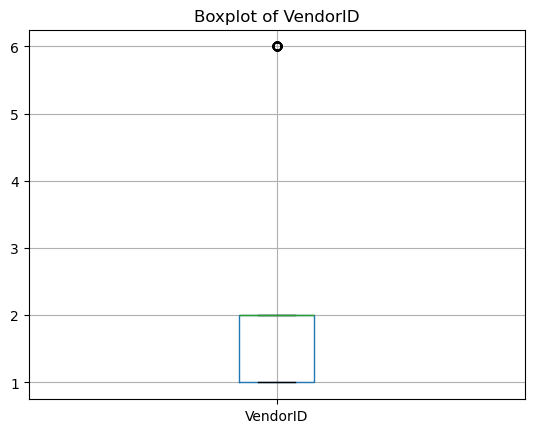

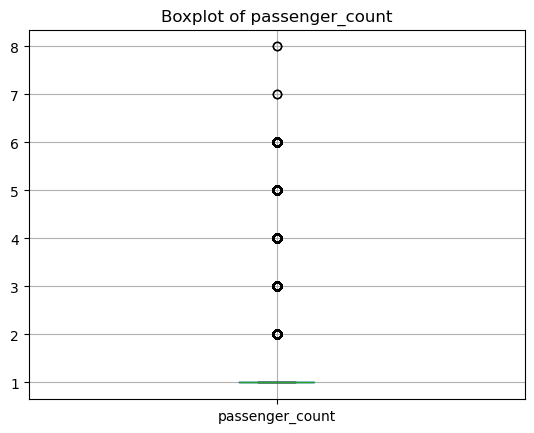

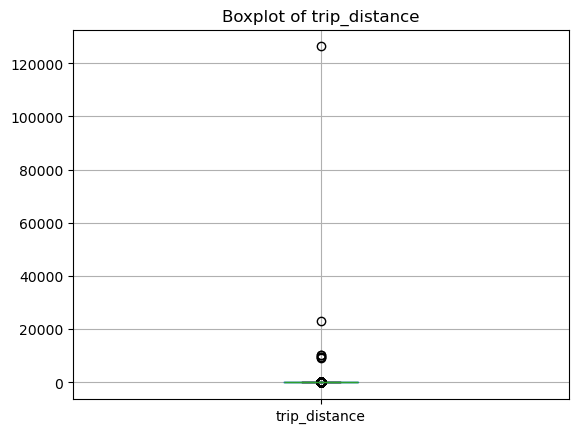

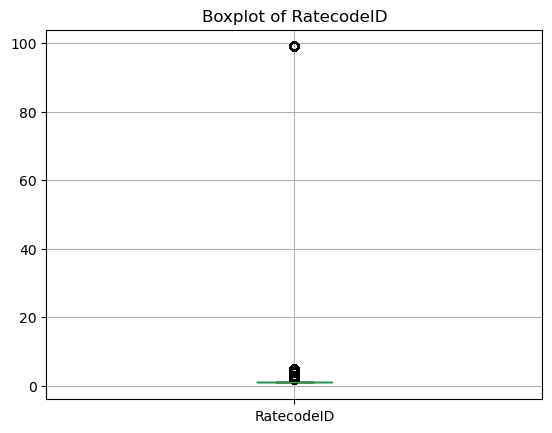

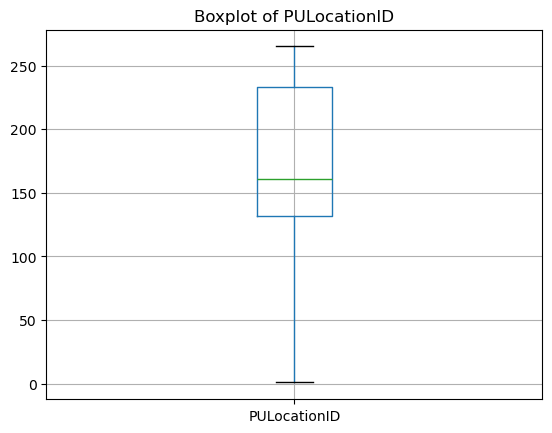

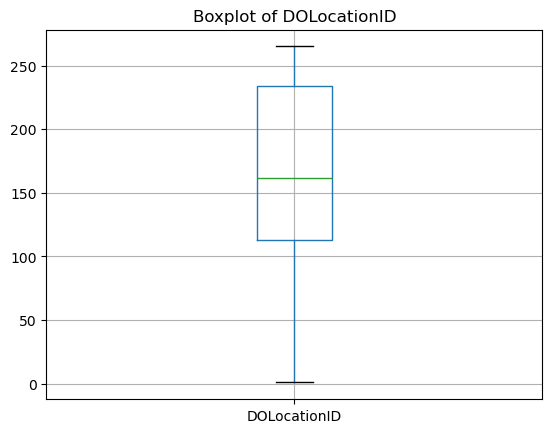

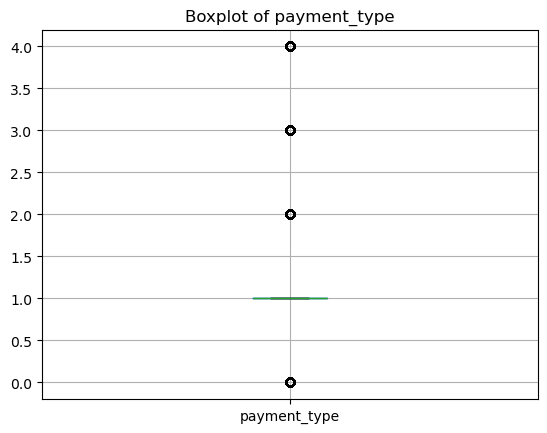

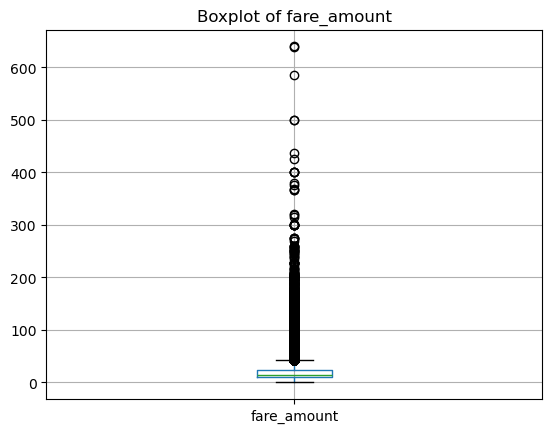

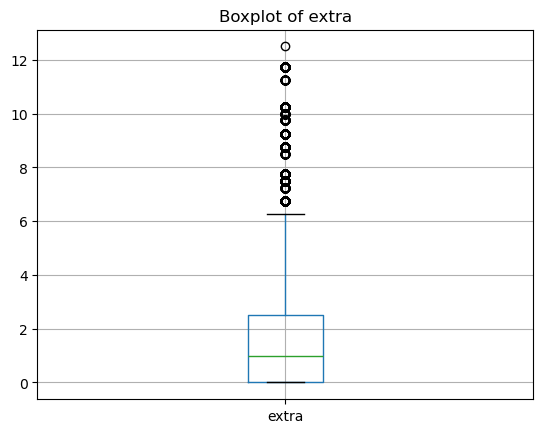

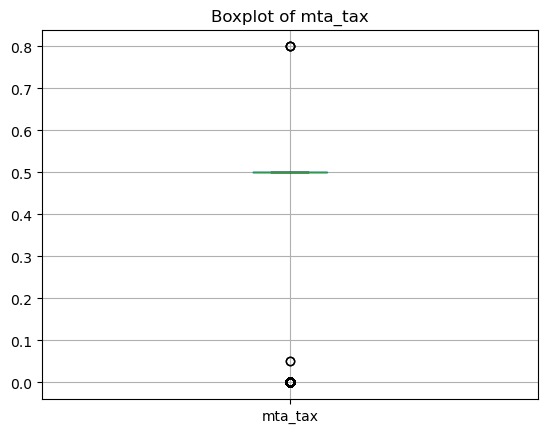

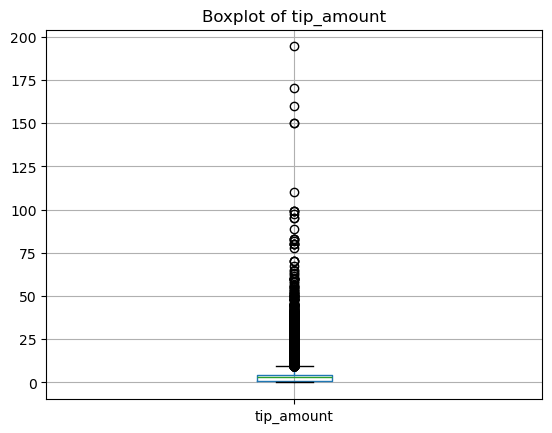

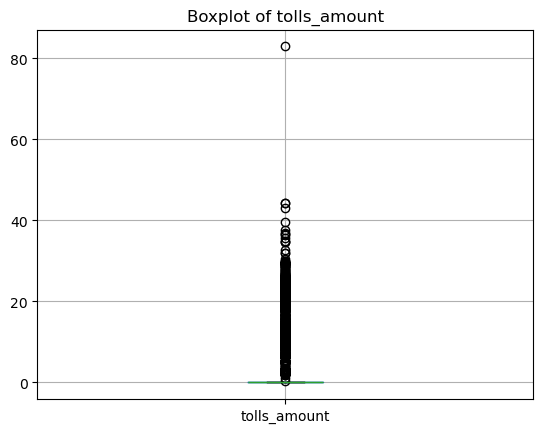

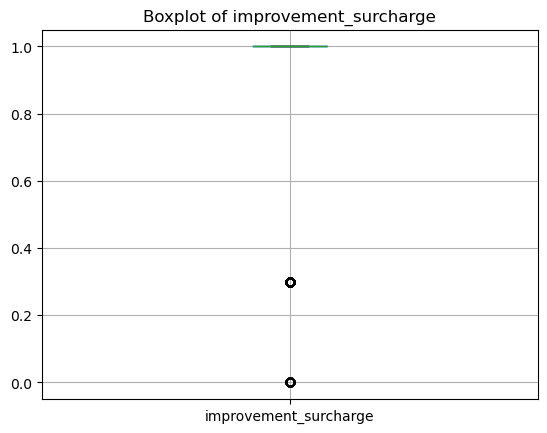

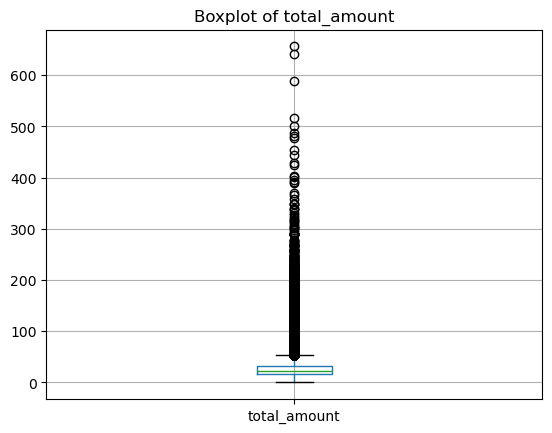

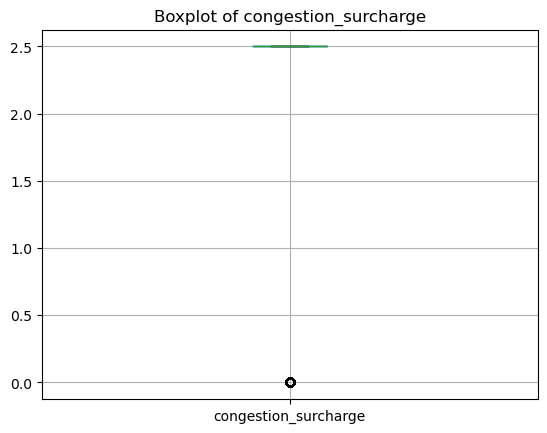

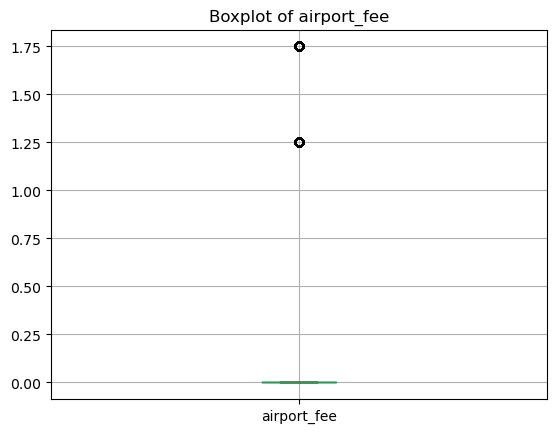

In [104]:
# Check for potential out of place values in various columns
for column in df.select_dtypes(include=['number']).columns:
    plt.figure()
    df.boxplot([column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [108]:
# remove passenger_count > 6
df=df[df['passenger_count']<=6]
df.passenger_count.value_counts()

passenger_count
1.0    193240
2.0     37076
3.0      9146
4.0      5194
5.0      3253
6.0      2087
Name: count, dtype: int64

In [109]:
# Continue with outlier handling
df['trip_distance'].sort_values(ascending=False)


173503    126360.46
123360     22910.92
245445     10451.89
61686      10433.95
235470      9679.36
            ...    
210053         0.00
176117         0.00
246119         0.00
3237           0.00
26575          0.00
Name: trip_distance, Length: 249996, dtype: float64

In [110]:
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  241502.000000    241502.000000  241502.000000  241502.000000   
mean        1.740060         1.390850       3.512180       1.605018   
std         0.438602         0.881645       4.593642       7.197817   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.080000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.480000       1.000000   
max         2.000000         6.000000     163.520000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  241502.000000  241502.000000  241502.000000  241502.000000   
mean      164.688425     163.734222       1.202359      19.890083   
std        63.555604      69.976291       0.462680      18.288248   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       161.000000     162.000000       1.000000      13.500000   
75%       233.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     637.900000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  241502.000000  241502.000000  241502.000000  241502.000000   
mean        1.650683       0.495494       3.604520       0.600274   
std         1.824203       0.047291       4.119356       2.180340   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.860000       0.000000   
75%         2.500000       0.500000       4.480000       0.000000   
max        12.500000       0.800000     194.420000      83.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          241502.000000  241502.000000         241502.000000   
mean                0.999356      29.072570              2.302383   
std                 0.023636      22.940345              0.674532   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      31.080000              2.500000   
max                 1.000000     656.150000              2.500000   

        airport_fee  
count  241502.00000  
mean        0.15079  
std         0.47611  
min         0.00000  
25%         0.00000  
50%         0.00000  
75%         0.00000  
max         1.75000

In [111]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler
cols_to_standardize = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

# Create a scaler
scaler = StandardScaler()

# Apply standardization
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

In [117]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-11 00:14:14   2023-11-11 00:23:06              1.0   
1         2  2023-04-02 12:43:34   2023-04-02 13:03:45              1.0   
2         1  2023-05-30 15:33:50   2023-05-30 16:01:40              1.0   
3         2  2023-04-05 21:15:46   2023-04-05 21:27:42              1.0   
5         1  2023-08-10 11:54:15   2023-08-10 12:50:02              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0      -0.549060         1.0           114           148             1   
1       0.080072         1.0           162           125             1   
2      -0.764576        99.0            74           137             1   
3      -0.320483         1.0           142           233             1   
5       3.371584         2.0           132           230             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0    -0.540790   1.00      0.5   -0.146751          0.00   
1     0.148178   0.00      0.5    0.416444          0.00   
2     0.361431   0.00      0.5   -0.875022          0.00   
3    -0.387686   1.00      0.5   -0.389508          0.00   
5     2.740012   4.25      0.5   -0.875022          6.94   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0     -0.482669                   2.5         0.00   
1                    1.0      0.124123                   2.5         0.00   
2                    1.0     -0.046755                   0.0         0.00   
3                    1.0     -0.404204                   2.5         0.00   
5                    1.0      2.337260                   2.5         1.75   

   negative_fare  
0          False  
1          False  
2          False  
3          False  
5          False

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [120]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'negative_fare']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [124]:
# Sample column names from NYC taxi data
columns = [
    "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime",
    "passenger_count", "trip_distance", "RatecodeID", "PULocationID",
    "DOLocationID", "payment_type", "pickup_hour", "trip_duration",
    "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
    "improvement_surcharge", "total_amount", "congestion_surcharge", "airport_fee"
]

# Define variable categories
categorical_vars = [
    "VendorID", "RatecodeID", "PULocationID", "DOLocationID", "payment_type"
]

datetime_vars = [
    "tpep_pickup_datetime", "tpep_dropoff_datetime"
]

numerical_vars = [
    "passenger_count", "trip_distance", "pickup_hour", "trip_duration",
    "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
    "improvement_surcharge", "total_amount", "congestion_surcharge", "airport_fee"
]

# Create a categorization dictionary
variable_types = {}

for col in columns:
    if col in categorical_vars:
        variable_types[col] = "Categorical"
    elif col in datetime_vars:
        variable_types[col] = "Datetime"
    elif col in numerical_vars:
        variable_types[col] = "Numerical"
    else:
        variable_types[col] = "Unknown"

# Convert to DataFrame for a clear table
df_var_types = pd.DataFrame(list(variable_types.items()), columns=["Variable", "Type"])
print(df_var_types)

                 Variable         Type
0                VendorID  Categorical
1    tpep_pickup_datetime     Datetime
2   tpep_dropoff_datetime     Datetime
3         passenger_count    Numerical
4           trip_distance    Numerical
5              RatecodeID  Categorical
6            PULocationID  Categorical
7            DOLocationID  Categorical
8            payment_type  Categorical
9             pickup_hour    Numerical
10          trip_duration    Numerical
11            fare_amount    Numerical
12                  extra    Numerical
13                mta_tax    Numerical
14             tip_amount    Numerical
15           tolls_amount    Numerical
16  improvement_surcharge    Numerical
17           total_amount    Numerical
18   congestion_surcharge    Numerical
19            airport_fee    Numerical


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Axes: title={'center': 'Taxi Pickups by Hour of Day'}, xlabel='Hour (0–23)', ylabel='Number of Pickups'>

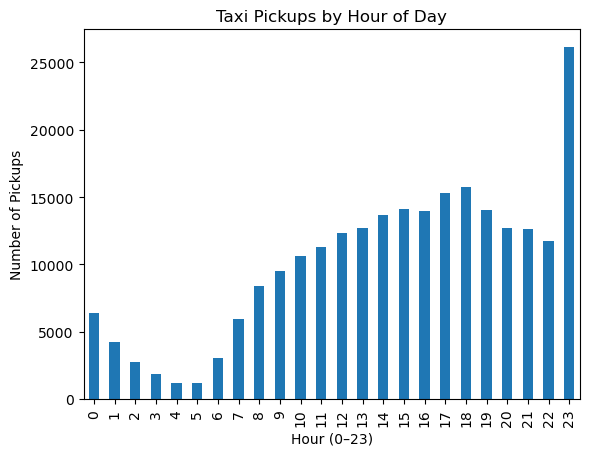

In [128]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

hourly_counts = df['pickup_hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', title='Taxi Pickups by Hour of Day', xlabel='Hour (0–23)', ylabel='Number of Pickups')

<Axes: title={'center': 'Taxi Pickups by Day of Week'}, xlabel='Day', ylabel='Number of Pickups'>

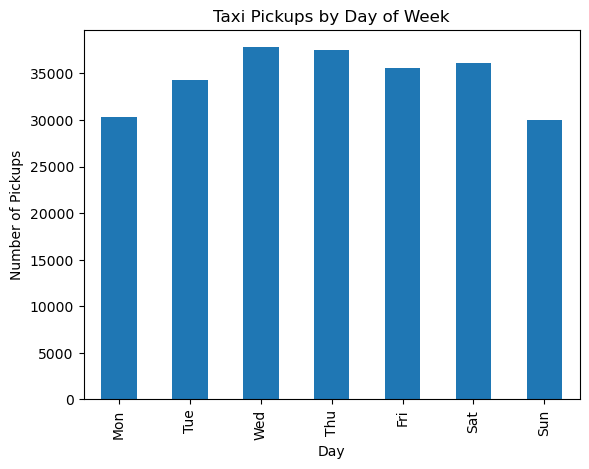

In [130]:
# Find and show the daily trends in taxi pickups (days of the week)
days_of_week = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['pickup_day_name'] = df['pickup_dayofweek'].map(days_of_week)

days_counts = df['pickup_day_name'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
days_counts.plot(kind='bar', title='Taxi Pickups by Day of Week', xlabel='Day', ylabel='Number of Pickups')


<Axes: title={'center': 'Taxi Pickups by Month'}, xlabel='Month', ylabel='Number of Pickups'>

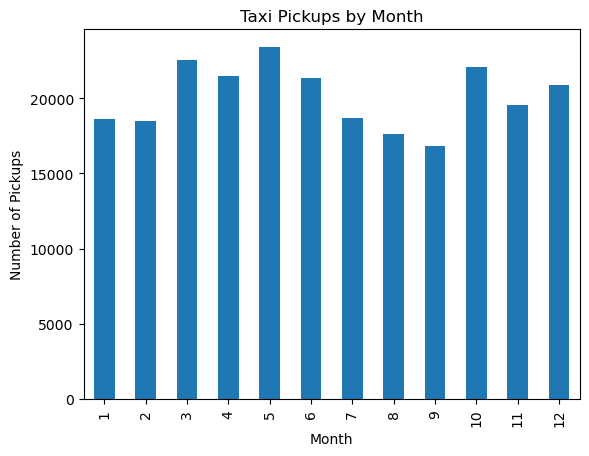

In [131]:
# Show the monthly trends in pickups
monthly_counts = df['pickup_month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', title='Taxi Pickups by Month', xlabel='Month', ylabel='Number of Pickups')


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [136]:
# Analyse the above parameters
#fare_amount
zero_count = df[df['fare_amount'] == 0]
zero_count.value_counts().sum()

0

In [138]:
#tip_amount
zero_count = df[df['tip_amount'] == 0]
zero_count.value_counts().sum()

0

In [140]:
#total_amount
zero_count = df[df['total_amount'] == 0]
zero_count.value_counts().sum()

0

In [142]:
#trip_distance
zero_count = df[df['trip_distance'] == 0]
zero_count.value_counts().sum()

0

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [146]:
# Create a df with non zero entries for the selected parameters.
df1 = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &  # tips can be zero
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()
df1.describe()

VendorID           tpep_pickup_datetime  passenger_count  \
count  38576.000000                          38576     38576.000000   
mean       1.778697  2023-07-01 11:33:43.863282944         1.420209   
min        1.000000            2023-01-01 00:08:12         1.000000   
25%        2.000000  2023-04-04 18:14:55.249999872         1.000000   
50%        2.000000            2023-06-24 23:01:59         1.000000   
75%        2.000000            2023-10-02 15:59:42         2.000000   
max        2.000000            2023-12-31 23:37:35         6.000000   
std        0.415130                            NaN         0.893041   

       trip_distance    RatecodeID  PULocationID  DOLocationID  payment_type  \
count   38576.000000  38576.000000  38576.000000  38576.000000  38576.000000   
mean        1.428270      1.253344    150.520998    151.227136      1.000026   
min         0.001702      1.000000      1.000000      1.000000      1.000000   
25%         0.367426      1.000000    132.000000     88.000000      1.000000   
50%         1.118466      1.000000    138.000000    145.000000      1.000000   
75%         2.246113      1.000000    170.000000    230.000000      1.000000   
max        19.110761      5.000000    265.000000    265.000000      2.000000   
std         1.270663      0.582908     56.943276     75.989666      0.005091   

        fare_amount         extra       mta_tax    tip_amount  tolls_amount  \
count  38576.000000  38576.000000  38576.000000  38576.000000  38576.000000   
mean       1.360141      2.577782      0.489255      1.599157      2.743507   
min        0.033350      0.000000      0.000000      0.001330      0.000000   
25%        0.454387      0.000000      0.500000      0.620360      0.000000   
50%        1.028527      1.000000      0.500000      1.309790      0.000000   
75%        2.253360      5.000000      0.500000      2.315410      6.550000   
max       33.792804     11.750000      0.500000     35.538508     39.550000   
std        1.178117      2.665360      0.072506      1.276530      3.897703   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           38576.000000  38576.000000           38576.00000   
mean                0.999710      1.517532               2.07655   
min                 0.300000      0.001196               0.00000   
25%                 1.000000      0.471983               2.50000   
50%                 1.000000      1.328118               2.50000   
75%                 1.000000      2.433597               2.50000   
max                 1.000000     27.335192               2.50000   
std                 0.014253      1.236230               0.93773   

        airport_fee   pickup_hour  pickup_dayofweek  pickup_month  
count  38576.000000  38576.000000      38576.000000  38576.000000  
mean       0.629718     15.286733          3.004044      6.504200  
min        0.000000      0.000000          0.000000      1.000000  
25%        0.000000     11.000000          1.000000      4.000000  
50%        0.000000     16.000000          3.000000      6.000000  
75%        1.750000     21.000000          5.000000     10.000000  
max        1.750000     23.000000          6.000000     12.000000  
std        0.803672      6.347017          1.984146      3.387772

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [149]:
# Group data by month and analyse monthly revenue
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['pickup_month'] = df1['tpep_pickup_datetime'].dt.to_period('M')

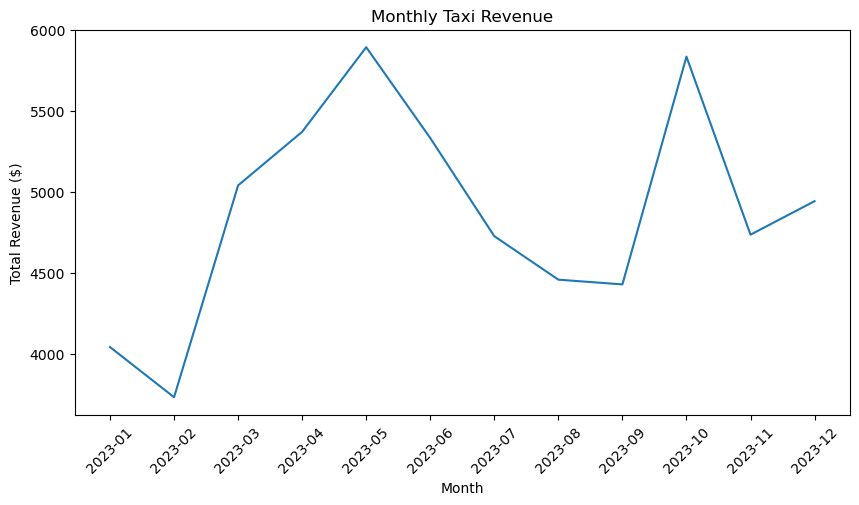

In [151]:
monthly_revenue = df1.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Total_Revenue']
monthly_revenue.sort_values('Month')

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Total_Revenue'])
plt.title('Monthly Taxi Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [154]:
# Calculate proportion of each quarter
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['pickup_quarter'] = df1['tpep_pickup_datetime'].dt.to_period('Q')


In [156]:
quarterly_revenue = df1.groupby('pickup_quarter')['total_amount'].sum().reset_index()
quarterly_revenue.columns = ['Quarter', 'Quarter_Revenue']


In [158]:
total_revenue = quarterly_revenue['Quarter_Revenue'].sum()
quarterly_revenue['Proportion'] = quarterly_revenue['Quarter_Revenue'] / total_revenue
print(quarterly_revenue)

  Quarter  Quarter_Revenue  Proportion
0  2023Q1     12814.089062    0.218893
1  2023Q2     16598.241825    0.283535
2  2023Q3     13613.522035    0.232550
3  2023Q4     15514.463698    0.265022


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

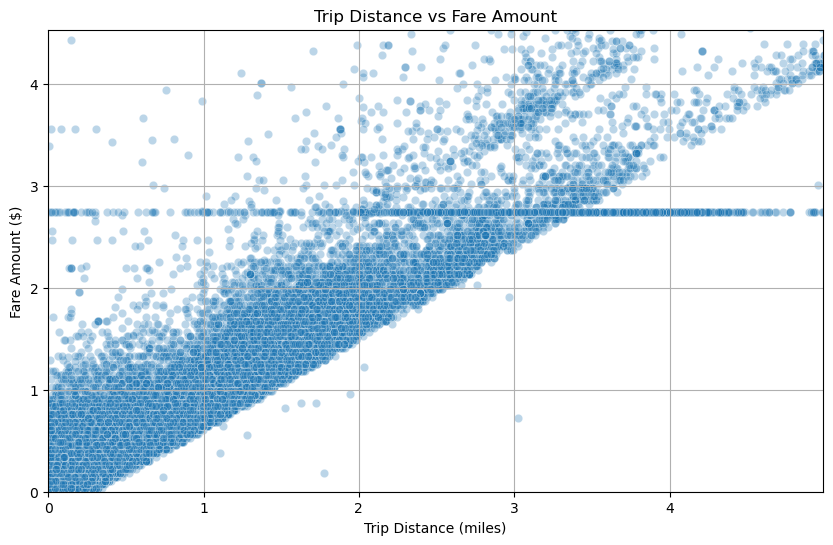

In [161]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, df1['trip_distance'].quantile(0.99))  # Limit x-axis to remove outliers
plt.ylim(0, df1['fare_amount'].quantile(0.99))    # Limit y-axis to remove outliers
plt.grid(True)
plt.show()

In [162]:
#the correlation value for trip_distance and fare_amount.
corr = df1['trip_distance'].corr(df1['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {corr:.4f}")

Correlation between trip_distance and fare_amount: 0.9251


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [166]:
# Show relationship between fare and trip duration
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60

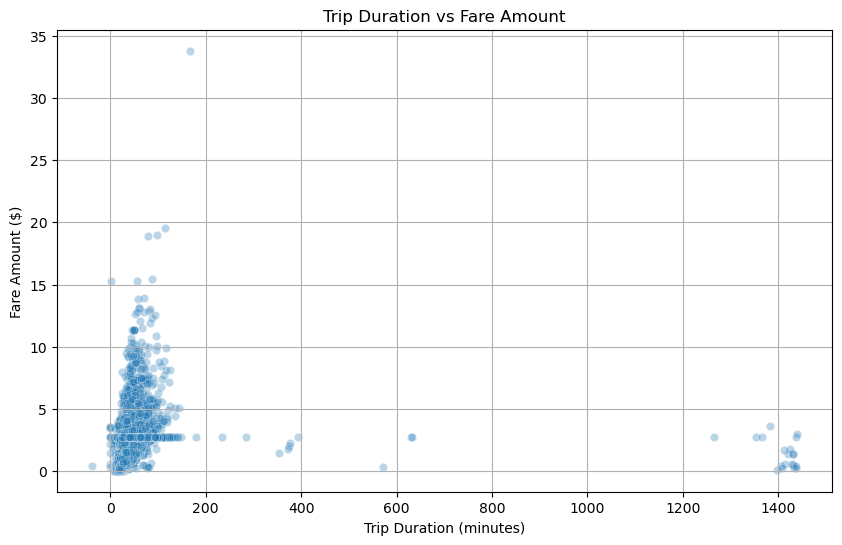

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

In [169]:
#the correlation value for trip_duration and fare_amount.
corr = df1['trip_duration'].corr(df1['fare_amount'])
print(f"Correlation between trip duration and fare amount: {corr:.4f}")

Correlation between trip duration and fare amount: 0.2891


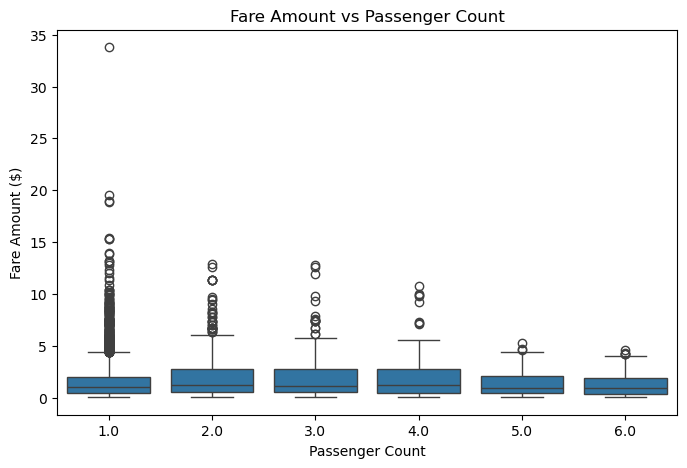

In [170]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

In [173]:
#the correlation value for number of passenger and fare_amount.
corr = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {corr:.4f}")

Correlation between passenger count and fare amount: 0.0384


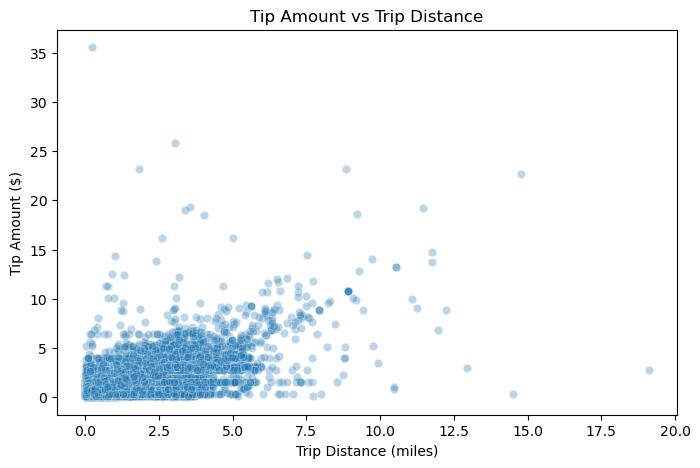

In [176]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df1, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()


In [177]:
#the correlation value for tip amount and trip distance.
corr = df1['trip_distance'].corr(df1['tip_amount'])
print(f"Correlation between trip distance and tip amount: {corr:.4f}")

Correlation between trip distance and tip amount: 0.7000


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [181]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df['payment_type'].value_counts().sort_values
print("Payment Type Distribution:")
print(payment_counts)

Payment Type Distribution:
<bound method Series.sort_values of payment_type
1    197270
2     41315
4      1721
3      1196
Name: count, dtype: int64>


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



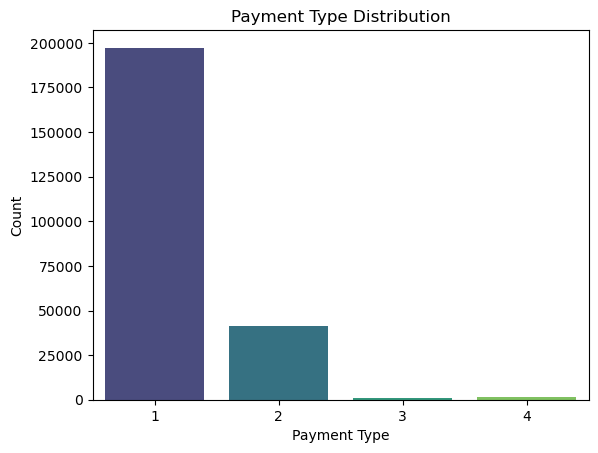

In [184]:
# Example: count of each payment_type
payment_counts = df['payment_type'].value_counts()

# Convert to DataFrame for plotting
payment_df = payment_counts.reset_index()
payment_df.columns = ['payment_type', 'count']

# Plot
sns.barplot(data=payment_df, x='payment_type', y='count', palette='viridis')
plt.title("Payment Type Distribution")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [189]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [192]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\jaina\OneDrive\Desktop\Yash\Datasets and Dictionary\taxi_zones")
# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


<Axes: >

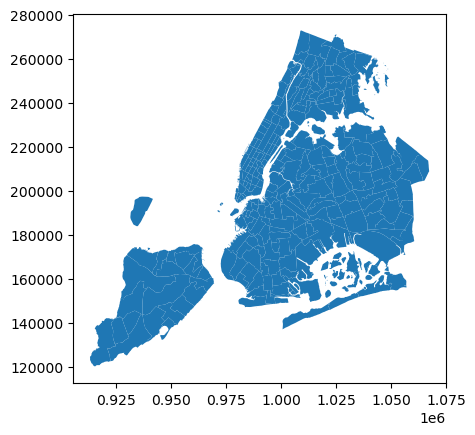

In [195]:
# print(zones.info())
zones.info()
# zones.plot()
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [199]:
# Merge zones and trip records using locationID and PULocationID
merged_df = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Check result
print(merged_df[['PULocationID', 'zone', 'borough']].head())


   PULocationID                     zone    borough
0           114  Greenwich Village South  Manhattan
1           162             Midtown East  Manhattan
2            74        East Harlem North  Manhattan
3           142      Lincoln Square East  Manhattan
4           132              JFK Airport     Queens


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [202]:
# Group data by location and calculate the number of trips
# Count number of trips per pickup location ID
trip_counts = df1.groupby('PULocationID').size().reset_index(name='trip_count')

# Merge with zone names
trip_counts = trip_counts.merge(zones[['LocationID', 'zone', 'borough']], 
                                left_on='PULocationID', right_on='LocationID', how='left')

# View result
print(trip_counts.sort_values(by='trip_count', ascending=False).head())


     PULocationID  trip_count  LocationID                          zone  \
62            132        8171       132.0                   JFK Airport   
66            138        6630       138.0             LaGuardia Airport   
116           230        1125       230.0     Times Sq/Theatre District   
81            161        1004       161.0                Midtown Center   
93            186         888       186.0  Penn Station/Madison Sq West   

       borough  
62      Queens  
66      Queens  
116  Manhattan  
81   Manhattan  
93   Manhattan  


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [205]:
# Merge trip counts back to the zones GeoDataFrame
trip_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')
zones_with_trips = zones.merge(trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Replace NaNs with 0 (zones with no trips)
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

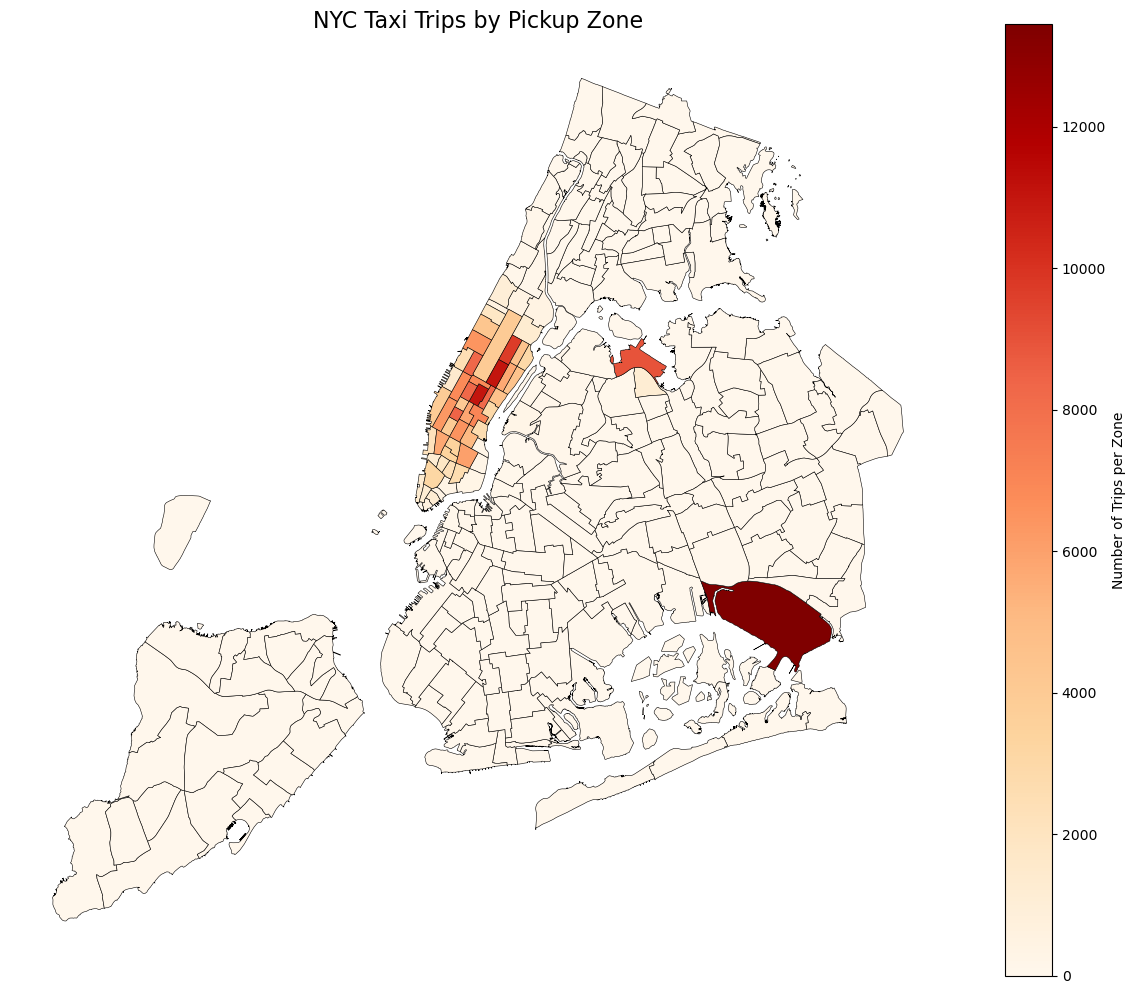

In [209]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Ploting the GeoDataFrame
zones_with_trips.plot(
    column='trip_count',          # Data column to base colors on
    ax=ax,                        # The axis to plot on
    cmap='OrRd',                  # Color map ('OrRd' for orange-red)
    legend=True,                  # Show legend
    legend_kwds={
        'label': "Number of Trips per Zone", 
        'orientation': "vertical"
    },
    edgecolor='black',            # Optional: adds border between zones
    linewidth=0.4
)

plt.title('NYC Taxi Trips by Pickup Zone', fontsize=16)
plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

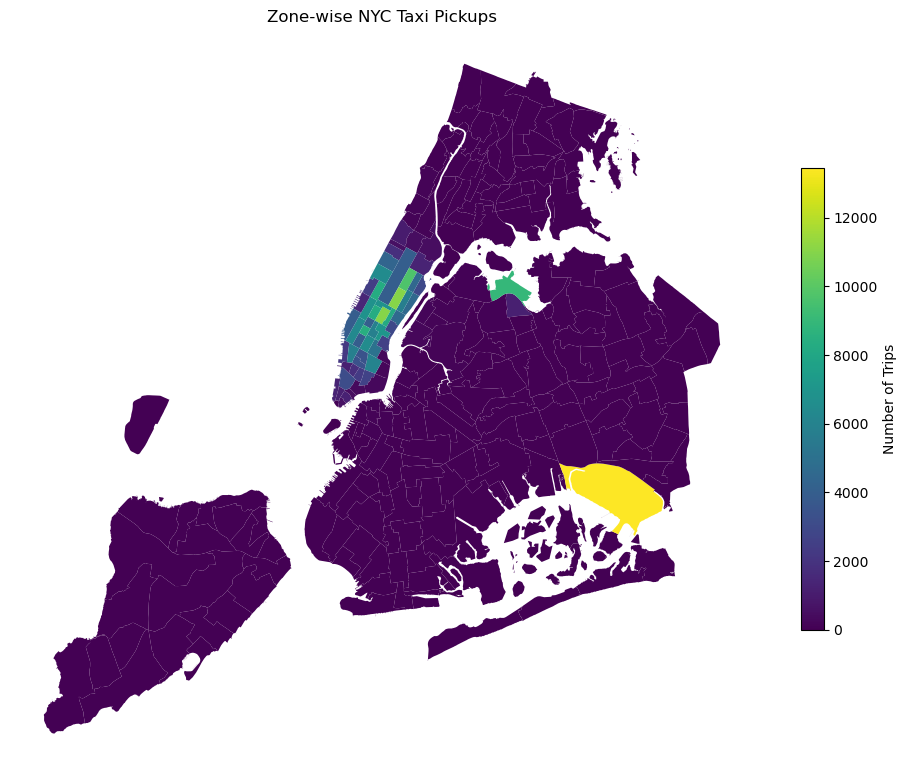

In [212]:
zone_counts = df['PULocationID'].value_counts().reset_index()
zone_counts.columns = ['LocationID', 'trip_count']
# Merge with zone geometry
zones['LocationID'] = zones['LocationID'].astype(int)
zone_trips = zones.merge(zone_counts, how='left', on='LocationID')
zone_trips['trip_count'] = zone_trips['trip_count'].fillna(0)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zone_trips.plot(column='trip_count', ax=ax, cmap='viridis', legend=True,
                legend_kwds={'label': "Number of Trips", 'shrink': 0.6})
ax.set_title('Zone-wise NYC Taxi Pickups')
ax.axis('off')
plt.show()

In [213]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

# Define figure and axis
zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    cmap='OrRd',
    legend=True,
    legend_kwds={
        'label': "Number of Trips per Zone",
        'orientation': "vertical"
    },
    edgecolor='black',
    linewidth=0.4
)

# Plot the map and display it
plt.title('Zone-wise Number of Taxi Trips', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


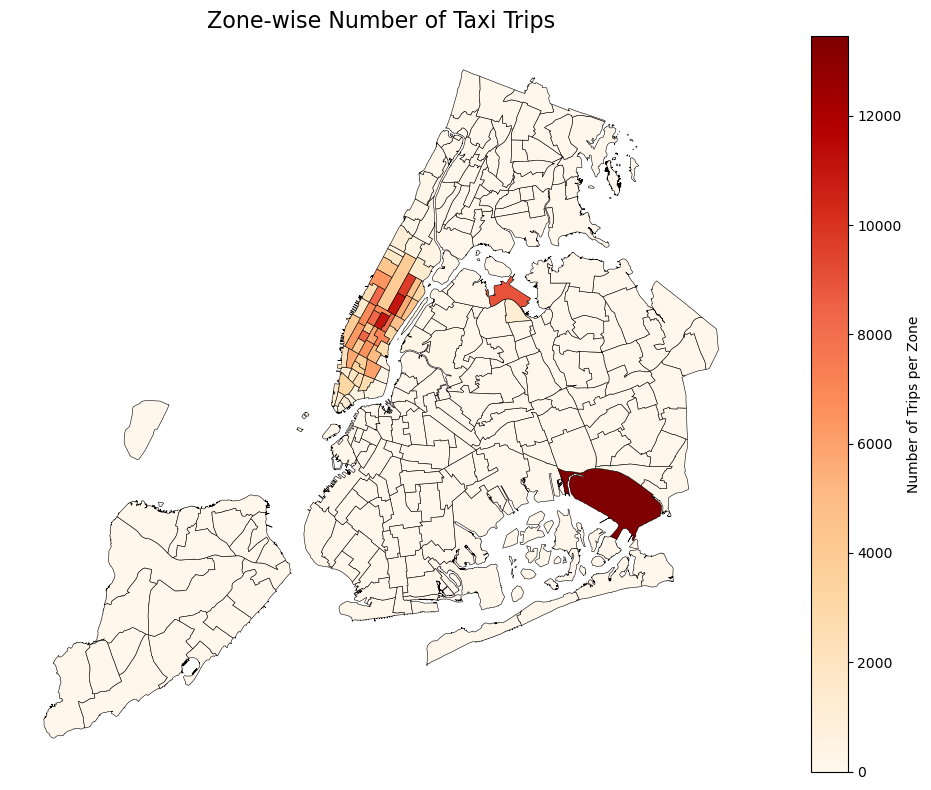

In [217]:
# can you try displaying the zones DF sorted by the number of trips?
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the map
zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    cmap='OrRd',
    legend=True,
    legend_kwds={
        'label': "Number of Trips per Zone",
        'orientation': "vertical"
    },
    edgecolor='black',
    linewidth=0.4
)

plt.title('Zone-wise Number of Taxi Trips', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [329]:
# Find routes which have the slowest speeds at different times of the day
# Extract hour and calculate trip duration
df1['hour'] = df1['tpep_pickup_datetime'].dt.hour
# Compute trip duration in minutes
df1['trip_duration_min'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out unreasonable trips
df1 = df1[(df1['trip_duration_min'] > 1) & (df1['trip_duration_min'] < 120)]
# Defined route as a string for easier grouping
df1['route'] = df1['PULocationID'].astype(str) + " -> " + df1['DOLocationID'].astype(str)

# Group by route and hour
grouped = df1.groupby(['route', 'hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_min': 'mean',
    'tpep_pickup_datetime': 'count'  # Number of trips for reference
}).rename(columns={'tpep_pickup_datetime': 'trip_count'}).reset_index()

# Calculate average speed (distance / duration)
grouped['average_speed_mph'] = grouped['trip_distance'] / (grouped['trip_duration_min'] / 60)  # convert to hours

slowest_speed = grouped[grouped['average_speed_mph'] < 10]
print(slowest_speed.sort_values('average_speed_mph').head(10))

            route  hour  trip_distance  trip_duration_min  trip_count  \
14512   249 -> 48    13       0.001702          39.700000           1   
7546   151 -> 161    13       0.001702          36.766667           1   
12927  237 -> 144    17       0.001702          34.516667           1   
638    113 -> 140    10       0.001702          32.166667           1   
14278  249 -> 162    19       0.001702          30.366667           1   
18693   90 -> 237    13       0.001702          29.983333           1   
1243   125 -> 229    22       0.001702          29.933333           1   
13960  246 -> 162    19       0.001702          29.166667           1   
8642    162 -> 43    17       0.001702          28.233333           1   
1560    13 -> 246    16       0.001702          26.233333           1   

       average_speed_mph  
14512           0.002573  
7546            0.002778  
12927           0.002959  
638             0.003175  
14278           0.003364  
18693           0.003407  
1243   

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour of the day: 23:00 with 5728 trips


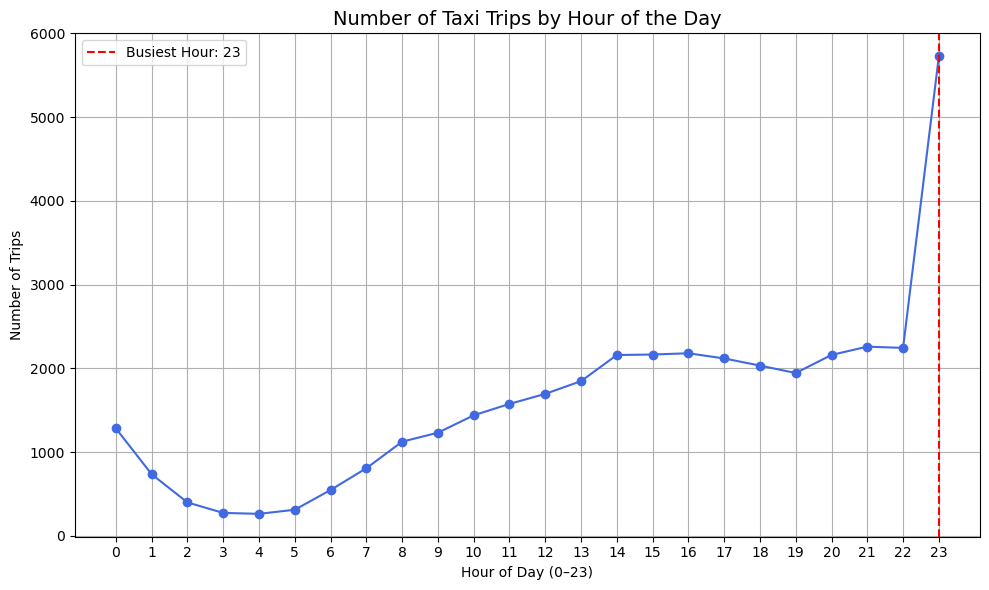

In [239]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df1.groupby('hour').size().reset_index(name='trip_count')

# Identify the busiest hour
busiest = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]
busiest_hour = busiest['hour']
busiest_count = busiest['trip_count']

print(f"Busiest hour of the day: {busiest_hour}:00 with {busiest_count} trips")

# Visualize
plt.figure(figsize=(10, 6))
plt.plot(trips_per_hour['hour'], trips_per_hour['trip_count'], marker='o', color='royalblue')
plt.title('Number of Taxi Trips by Hour of the Day', fontsize=14)
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}')
plt.legend()
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [327]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01
hourly_trips = df1.groupby('hour').size().reset_index(name='sampled_trip_count')

# Scale up to estimate actual trips
hourly_trips['actual_trip_count'] = hourly_trips['sampled_trip_count'] / sample_fraction

# Get top 5 busiest hours
top5_hours = hourly_trips.sort_values('actual_trip_count', ascending=False).head(5)
print("Top 5 busiest hours (estimated actual trips):")
print(top5_hours[['hour', 'actual_trip_count']])



Top 5 busiest hours (estimated actual trips):
    hour  actual_trip_count
23    23           572800.0
21    21           225900.0
22    22           224400.0
16    16           218000.0
15    15           216500.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

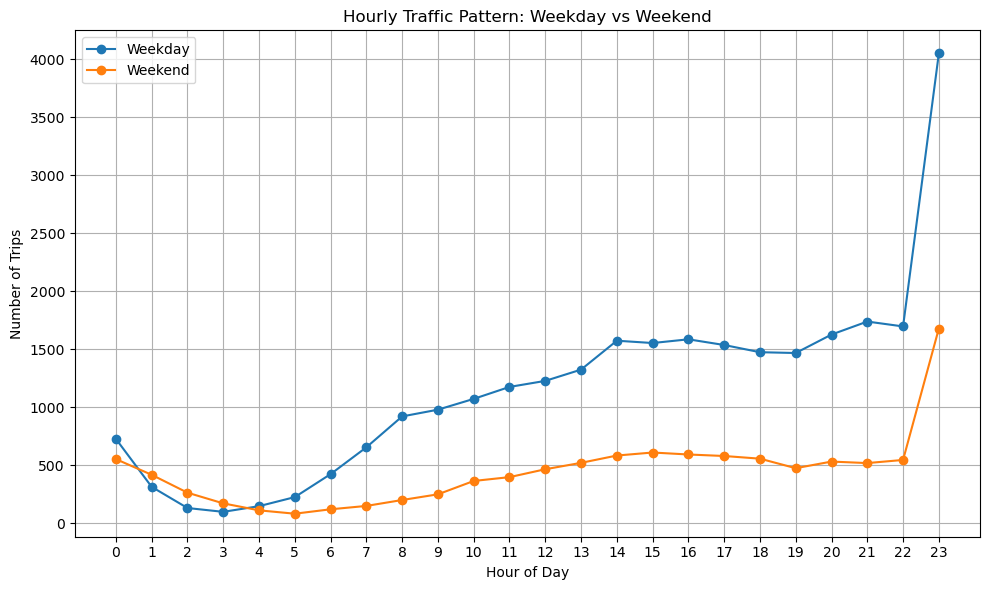

In [247]:
# Compare traffic trends for the week days and weekends
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek

# Label as Weekday or Weekend
df1['day_type'] = df1['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count trips by hour and day type
traffic_by_hour = df1.groupby(['day_type', 'hour']).size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(10, 6))

# Weekday
weekday = traffic_by_hour[traffic_by_hour['day_type'] == 'Weekday']
plt.plot(weekday['hour'], weekday['trip_count'], label='Weekday', marker='o')

# Weekend
weekend = traffic_by_hour[traffic_by_hour['day_type'] == 'Weekend']
plt.plot(weekend['hour'], weekend['trip_count'], label='Weekend', marker='o')

plt.title('Hourly Traffic Pattern: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**Weekday traffic usually shows sharp peaks at commute times (8 AM & 5–6 PM)

**Weekend traffic tends to be more evenly distributed or peak later in the day

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [261]:
# Find top 10 pickup and dropoff zones
top_pickups = df['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones:")
print(top_pickups)

top_dropoffs = df['DOLocationID'].value_counts().head(10)
print("Top 10 Dropoff Zones:")
print(top_dropoffs)

Top 10 Pickup Zones:
PULocationID
132    13454
161    11028
237    10989
236     9722
138     8951
186     8409
230     8280
142     8258
162     8243
170     7070
Name: count, dtype: int64
Top 10 Dropoff Zones:
DOLocationID
236    10349
237     9721
161     9083
230     7302
170     7228
162     6816
142     6677
239     6628
141     6514
68      6082
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [265]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups and dropoffs per zone
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_count']

dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_count']

# Step 2: Merge counts on zone
zone_counts = pd.merge(pickup_counts, dropoff_counts, on='zone', how='outer').fillna(0)

# Step 3: Calculate pickup/dropoff ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count'].replace(0, 1)  # avoid division by zero

# Step 4: Top 10 zones with highest pickup/dropoff ratios
top10 = zone_counts.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Step 5: Bottom 10 zones with lowest pickup/dropoff ratios
bottom10 = zone_counts.sort_values('pickup_dropoff_ratio').head(10)

# Display
print("Top 10 Zones with High Pickup/Dropoff Ratio:")
print(top10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("Bottom 10 Zones with Low Pickup/Dropoff Ratio:")
print(bottom10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


Top 10 Zones with High Pickup/Dropoff Ratio:
     zone  pickup_count  dropoff_count  pickup_dropoff_ratio
68     70        1185.0            131              9.045802
125   132       13454.0           2635              5.105882
131   138        8951.0           2726              3.283566
42     44           5.0              2              2.500000
179   186        8409.0           5035              1.670109
41     43        3971.0           2727              1.456179
239   249        5741.0           3982              1.441738
107   114        3414.0           2372              1.439292
135   142        8258.0           6677              1.236783
98    100        4021.0           3272              1.228912
Bottom 10 Zones with Low Pickup/Dropoff Ratio:
     zone  pickup_count  dropoff_count  pickup_dropoff_ratio
171   178           0.0             27                   0.0
82     84           0.0              1                   0.0
56     58           0.0              3                

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [271]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Defined night hours: 11 PM (23) to 5 AM (5)
night_df = df1[(df1['hour'] >= 23) | (df1['hour'] <= 5)]

# Top 10 Pickup Zones during night
top_night_pickups = night_df['PULocationID'].value_counts().head(10)
print("Top 10 Night Pickup Zones (11 PM to 5 AM):")
print(top_night_pickups)

# Top 10 Dropoff Zones during night
top_night_dropoffs = night_df['DOLocationID'].value_counts().head(10)
print("Top 10 Night Dropoff Zones (11 PM to 5 AM):")
print(top_night_dropoffs)


Top 10 Night Pickup Zones (11 PM to 5 AM):
PULocationID
132    2074
138    1191
249     390
79      343
48      327
230     263
148     259
142     222
114     215
186     213
Name: count, dtype: int64
Top 10 Night Dropoff Zones (11 PM to 5 AM):
DOLocationID
263    232
239    227
238    203
181    200
138    180
236    172
265    172
141    169
87     160
243    155
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [273]:
# Filter for night hours (11 PM to 5 AM)
night_df = df1[(df1['hour'] >= 23) | (df1['hour'] <= 5)]
night_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
47             2  2023-07-20 05:36:40   2023-07-20 05:52:36              1.0   
53             2  2023-10-20 00:17:31   2023-10-20 00:42:38              2.0   
74             2  2023-10-24 00:20:24   2023-10-24 00:48:11              2.0   
146            2  2023-04-30 23:55:23   2023-05-01 00:32:53              1.0   
159            2  2023-12-10 01:49:42   2023-12-10 02:10:54              4.0   
...          ...                  ...                   ...              ...   
249919         2  2023-10-12 00:57:58   2023-10-12 01:45:07              1.0   
249944         2  2023-09-09 04:40:21   2023-09-09 05:14:10              2.0   
249950         2  2023-05-23 23:40:31   2023-05-24 00:00:00              3.0   
249997         1  2023-10-27 23:13:59   2023-10-27 23:46:47              1.0   
249999         1  2023-10-04 23:07:08   2023-10-04 23:48:02              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
47           1.068396         1.0           263           138             1   
53           0.254226         1.0           113           236             1   
74           0.563349         1.0           239           231             1   
146          3.312807         2.0           132            68             1   
159          0.121433         1.0           114           237             1   
...               ...         ...           ...           ...           ...   
249919       3.632815         2.0           132           151             1   
249944       3.473900         3.0           186             1             1   
249950       2.809937         1.0           132           145             1   
249997       0.737503         1.0           264           243             1   
249999       2.435506         2.0           219           164             1   

        fare_amount  ...  pickup_dayofweek  pickup_month  pickup_day_name  \
47         0.760595  ...                 3       2023-07              Thu   
53         0.377835  ...                 4       2023-10              Fri   
74         0.607491  ...                 1       2023-10              Tue   
146        2.740012  ...                 6       2023-04              Sun   
159        0.186454  ...                 6       2023-12              Sun   
...             ...  ...               ...           ...              ...   
249919     2.740012  ...                 3       2023-10              Thu   
249944     4.035929  ...                 5       2023-09              Sat   
249950     2.521292  ...                 1       2023-05              Tue   
249997     0.798871  ...                 4       2023-10              Fri   
249999     2.740012  ...                 2       2023-10              Wed   

        pickup_quarter  trip_duration  trip_duration_min       route  hour  \
47              2023Q3      15.933333          15.933333  263 -> 138     5   
53              2023Q4      25.116667          25.116667  113 -> 236     0   
74              2023Q4      27.783333          27.783333  239 -> 231     0   
146             2023Q2      37.500000          37.500000   132 -> 68    23   
159             2023Q4      21.200000          21.200000  114 -> 237     1   
...                ...            ...                ...         ...   ...   
249919          2023Q4      47.150000          47.150000  132 -> 151     0   
249944          2023Q3      33.816667          33.816667    186 -> 1     4   
249950          2023Q2      19.483333          19.483333  132 -> 145    23   
249997          2023Q4      32.800000          32.800000  264 -> 243    23   
249999          2023Q4      40.900000          40.900000  219 -> 164    23   

        day_of_week  day_type  
47                3   Weekday  
53                4   Weekday  
74                1   Weekday  
146               6   Weekend  
159               6   Weekend  
...             ...       ...  
249919      

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [275]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Calculate fare per mile per passenger
df1['fare_per_mile_per_passenger'] = df1['fare_per_mile'] / df1['passenger_count']

# Group by passenger count and calculate average
result = df1.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Round and display
result = result.round(2)
print("Average Fare per Mile per Passenger by Passenger Count:")
print(result)



Average Fare per Mile per Passenger by Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                         1.84
1              2.0                         0.85
2              3.0                         0.69
3              4.0                         0.53
4              5.0                         0.55
5              6.0                         0.29


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

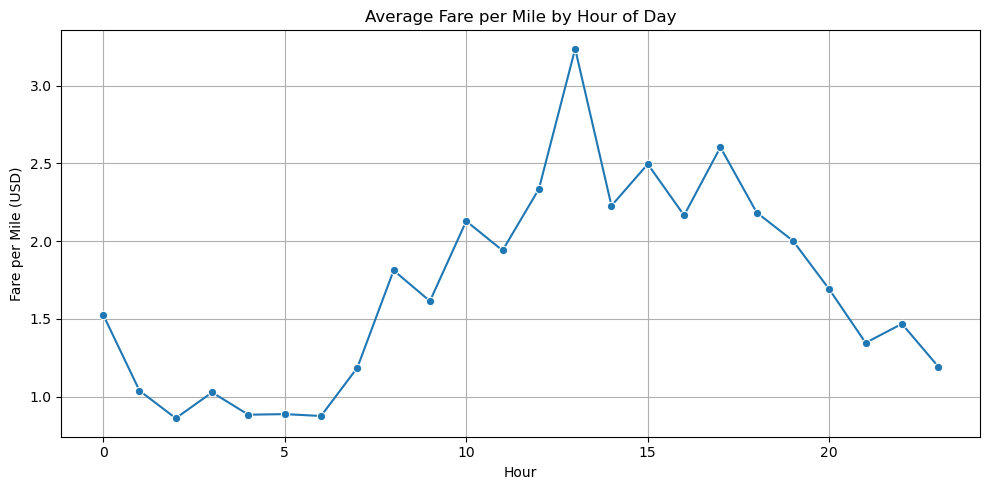

In [285]:
# Compare the average fare per mile for different days and for different times of the day
# Extract time features
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek  # 0=Mon, 6=Sun
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df1['day_name'] = df1['day_of_week'].apply(lambda x: day_names[x])

# Step 3: Calculate fare per mile
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Step 4a: Average fare per mile by hour
avg_by_hour = df1.groupby('hour')['fare_per_mile'].mean().reset_index()

# Step 4b: Average fare per mile by day of week
avg_by_day = df1.groupby('day_name')['fare_per_mile'].mean().reindex(day_names).reset_index()

# Plot 1: Average Fare per Mile by Hour of Day
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_by_hour, x='hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

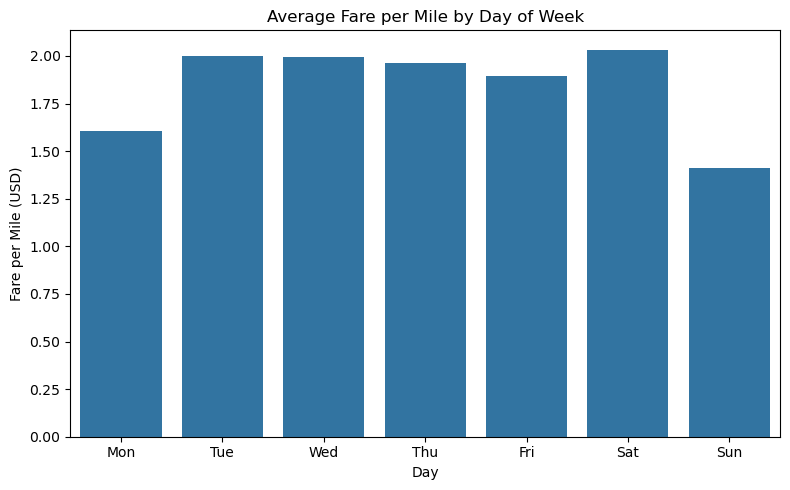

In [287]:
# Plot 2: Average Fare per Mile by Day of Week
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_by_day, x='day_name', y='fare_per_mile')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day')
plt.ylabel('Fare per Mile (USD)')
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

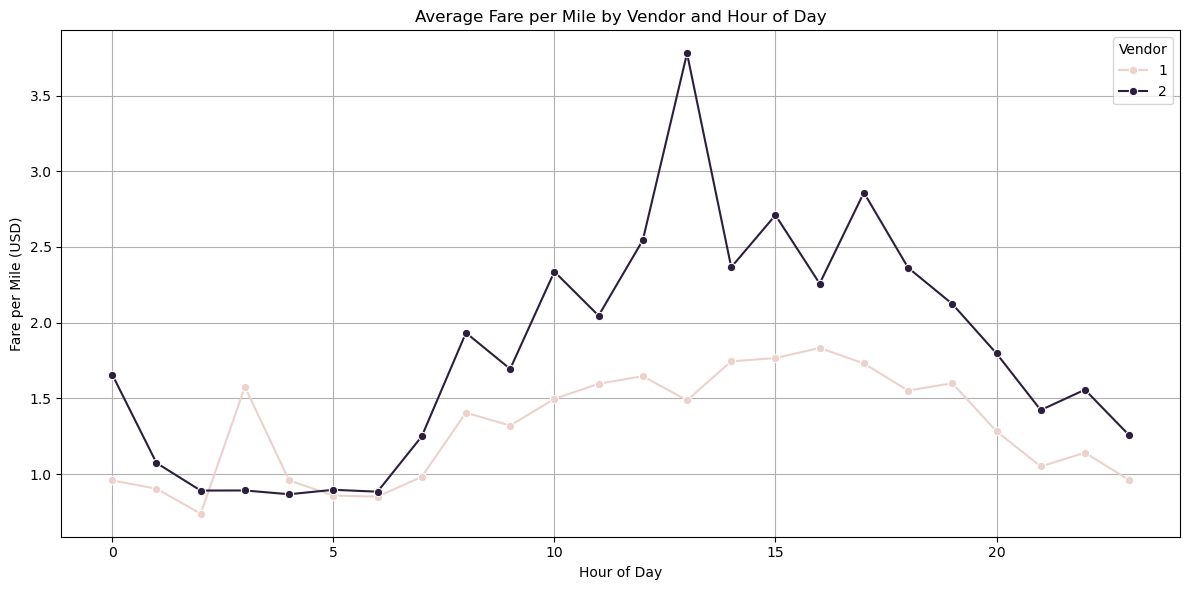

In [298]:
# Compare fare per mile for different vendors
# Calculate fare per mile
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Group by vendor and hour
avg_fare_by_vendor_hour = df1.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

#Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_fare_by_vendor_hour, x='hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Vendor and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.legend(title='Vendor')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [302]:
# Defining distance tiers
def distance_tier(dist):
    if dist <= 2:
        return '0–2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '5+ miles'

df1['distance_tier'] = df1['trip_distance'].apply(distance_tier)

# Step 3: Calculate fare per mile
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Step 4: Group by vendor and distance tier
tiered_fares = (
    df1.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .round(2)
)

print("Average Fare per Mile by Vendor and Distance Tier:")
print(tiered_fares)


Average Fare per Mile by Vendor and Distance Tier:
   VendorID distance_tier  fare_per_mile
0         1     0–2 miles           1.54
1         1     2–5 miles           0.90
2         1      5+ miles           0.87
3         2     0–2 miles           2.38
4         2     2–5 miles           0.90
5         2      5+ miles           0.90


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

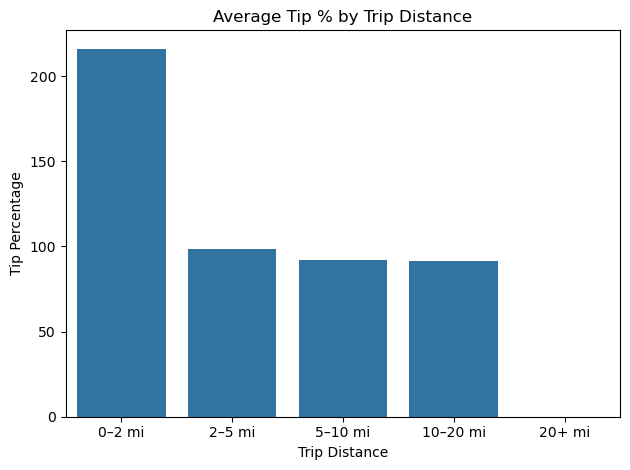

In [304]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
df1['tip_percentage'] = (df1['tip_amount'] / df1['fare_amount']) * 100

# Step 3: Bin trip distances
bins = [0, 2, 5, 10, 20, df['trip_distance'].max()]
labels = ['0–2 mi', '2–5 mi', '5–10 mi', '10–20 mi', '20+ mi']
df1['distance_bin'] = pd.cut(df1['trip_distance'], bins=bins, labels=labels)

# percentage based on distances
distance_tips = df1.groupby('distance_bin')['tip_percentage'].mean().reset_index()

sns.barplot(data=distance_tips, x='distance_bin', y='tip_percentage')
plt.title('Average Tip % by Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.tight_layout()
plt.show()

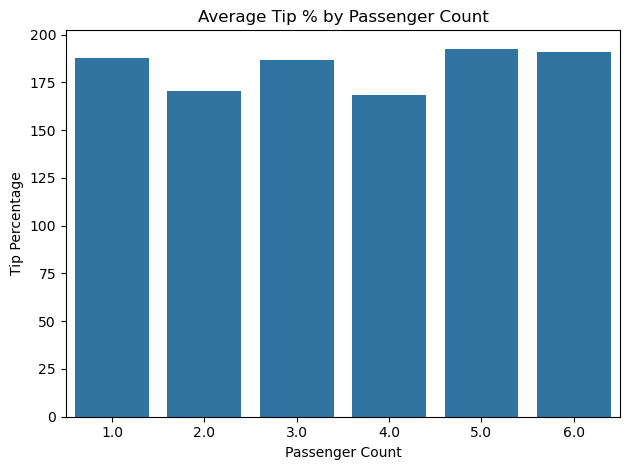

In [306]:
# percentage based on passenger counts
passenger_tips = df1.groupby('passenger_count')['tip_percentage'].mean().reset_index()

sns.barplot(data=passenger_tips, x='passenger_count', y='tip_percentage')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.tight_layout()
plt.show()

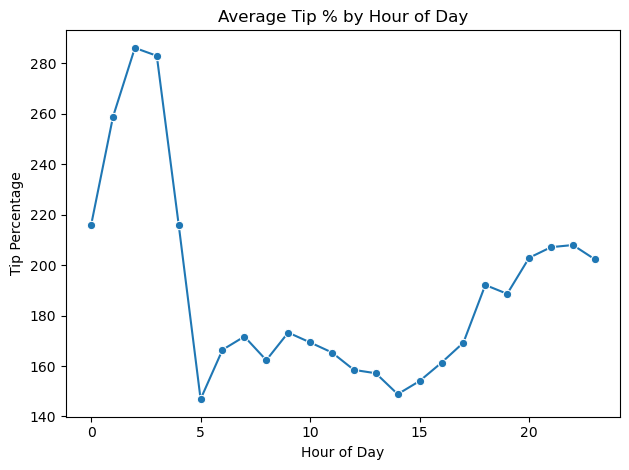

In [308]:
# percentage based on pickup times
hourly_tips = df1.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

sns.lineplot(data=hourly_tips, x='pickup_hour', y='tip_percentage', marker='o')
plt.title('Average Tip % by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Tip Percentage')
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

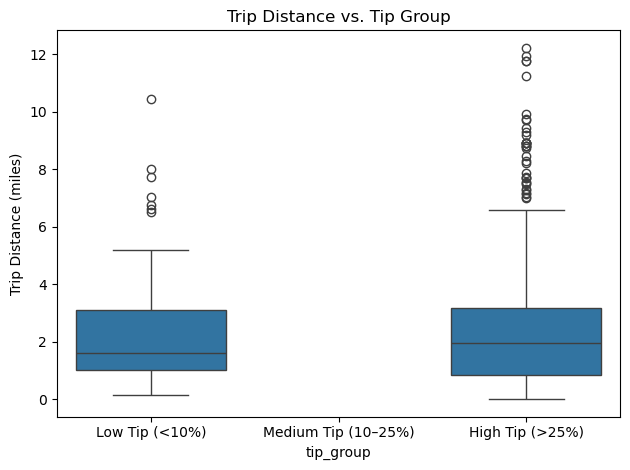

In [311]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Define tip groups
df1['tip_group'] = pd.cut(df1['tip_percentage'],
                               bins=[-1, 10, 25, 100],
                               labels=['Low Tip (<10%)', 'Medium Tip (10–25%)', 'High Tip (>25%)'])

# Focus only on low vs. high for clarity
tip_comp = df1[df1['tip_group'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])]

# Comparing Trip Distances
sns.boxplot(data=tip_comp, x='tip_group', y='trip_distance')
plt.title('Trip Distance vs. Tip Group')
plt.ylabel('Trip Distance (miles)')
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

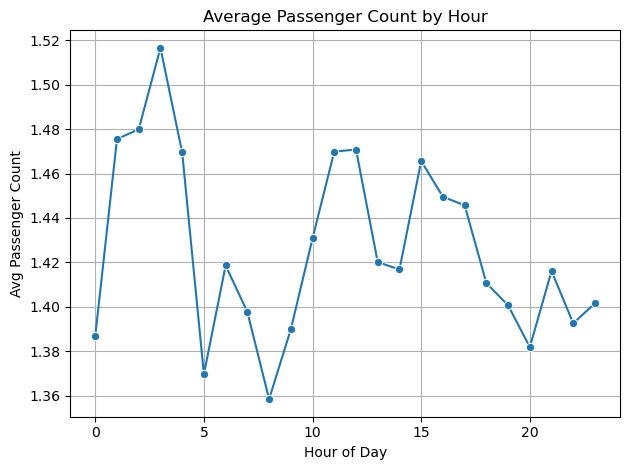

In [317]:
# See how passenger count varies across hours and days
df1['day_name'] = df1['day_of_week'].apply(lambda x: day_names[x])
avg_passenger_by_hour = df1.groupby('hour')['passenger_count'].mean().reset_index()

# Average Passenger Count by Hour of Day
sns.lineplot(data=avg_passenger_by_hour, x='hour', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()


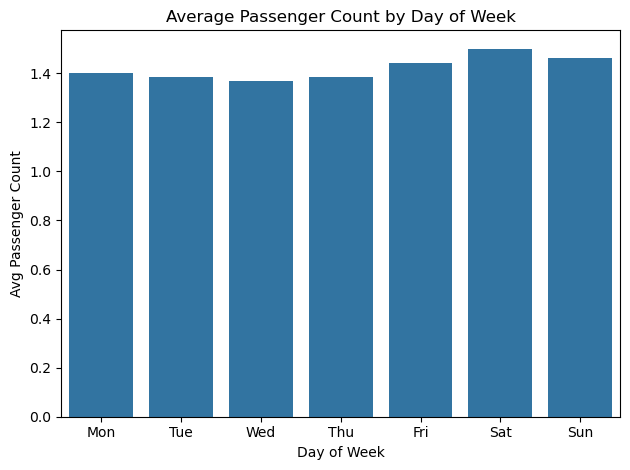

In [319]:
# Average Passenger Count by Day of Week
avg_passenger_by_day = df1.groupby('day_name')['passenger_count'].mean().reindex(day_names).reset_index()

sns.barplot(data=avg_passenger_by_day, x='day_name', y='passenger_count')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Passenger Count')
plt.tight_layout()
plt.show()

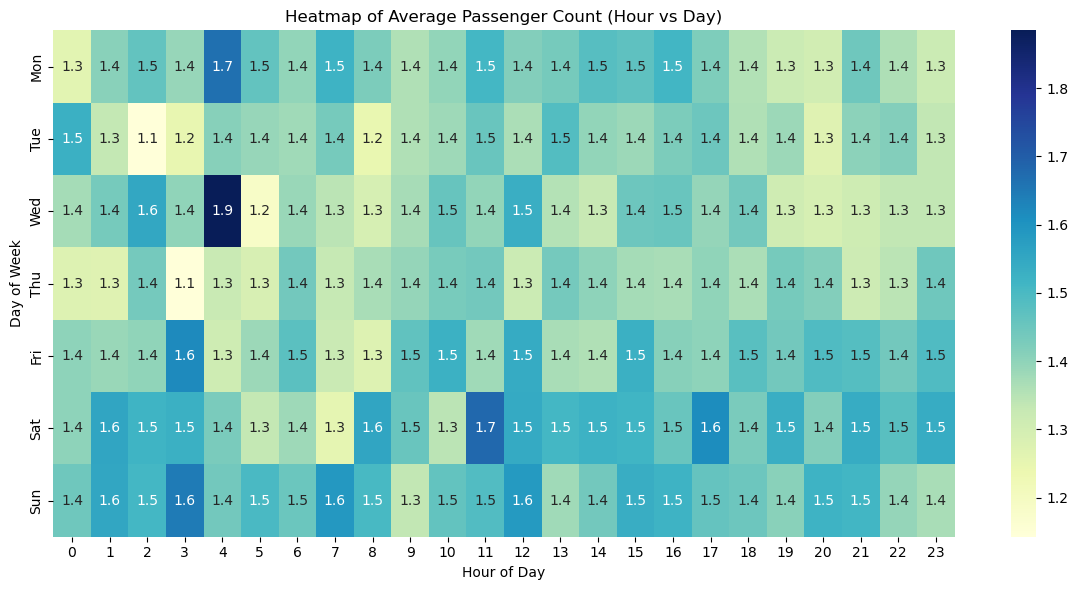

In [323]:
# Heatmap: Hour vs. Day
pivot_table = df1.pivot_table(index='day_name', columns='hour', values='passenger_count', aggfunc='mean').reindex(day_names)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Average Passenger Count (Hour vs Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

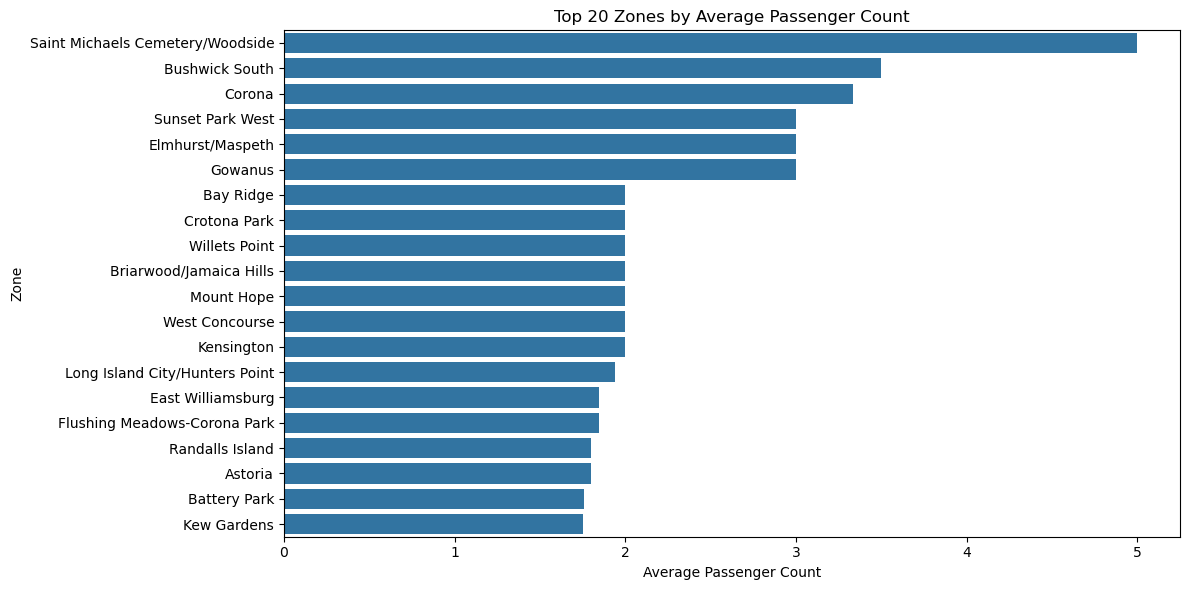

In [337]:
# How does passenger count vary across zones

avg_passenger_per_zone = (
    df1.groupby('zone')['passenger_count']
    .mean()
    .reset_index()
    .sort_values(by='passenger_count', ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_passenger_per_zone.head(20), x='passenger_count', y='zone')
plt.title('Top 20 Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

In [351]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_per_zone = (
    df1.groupby('zone')['passenger_count']
    .mean()
    .reset_index()
    .rename(columns={'passenger_count': 'avg_passenger_count'})
)
zones_with_trips = zones_with_trips.merge(avg_passenger_per_zone, on='zone', how='left')
print(zones_with_trips[['zone', 'avg_passenger_count']].head())

                      zone  avg_passenger_count
0           Newark Airport             1.000000
1              Jamaica Bay                  NaN
2  Allerton/Pelham Gardens                  NaN
3            Alphabet City             1.384615
4            Arden Heights                  NaN


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [355]:
# How often is each surcharge applied?
surcharge_columns = ['extra', 'mta_tax', 'congestion_surcharge', 'improvement_surcharge']
for col in surcharge_columns:
    print(f"\n{col} Distribution:")
    print(df1[col].value_counts(normalize=True) * 100)


extra Distribution:
extra
0.00     29.150008
1.00     21.849525
5.00     14.632120
2.50     12.015162
6.00      5.140454
3.50      4.943143
7.50      4.026689
4.25      1.617426
9.25      1.448673
10.25     0.690586
3.75      0.540007
8.75      0.524430
2.75      0.514045
1.75      0.493276
6.75      0.415390
7.75      0.394621
11.75     0.353082
9.75      0.215484
1.25      0.210291
2.25      0.179137
10.00     0.155771
6.25      0.145387
7.25      0.140194
11.25     0.106444
8.50      0.088270
4.75      0.002596
5.25      0.002596
4.50      0.002596
0.25      0.002596
Name: proportion, dtype: float64

mta_tax Distribution:
mta_tax
0.5    97.871125
0.0     2.128875
Name: proportion, dtype: float64

congestion_surcharge Distribution:
congestion_surcharge
2.5    83.080638
0.0    16.919362
Name: proportion, dtype: float64

improvement_surcharge Distribution:
improvement_surcharge
1.0    99.958461
0.3     0.041539
Name: proportion, dtype: float64


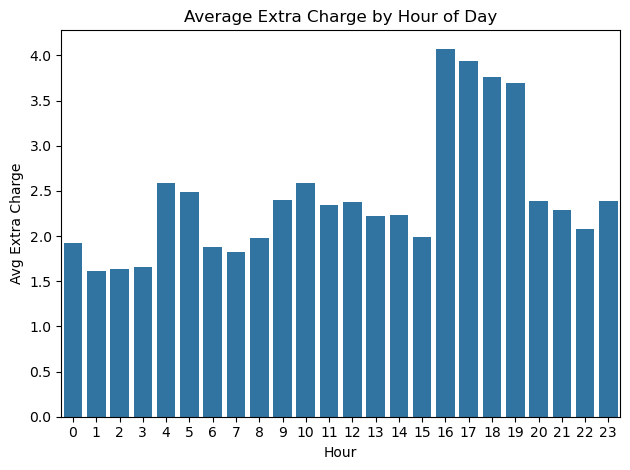

In [359]:
# Average surcharge by pickup hour
avg_extra_by_hour = df1.groupby('hour')['extra'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=avg_extra_by_hour, x='hour', y='extra')
plt.title('Average Extra Charge by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Avg Extra Charge')
plt.tight_layout()
plt.show()

In [365]:
# Average extra charge by pickup zone
avg_extra_by_zone = (
    df1.groupby('zone')['extra']
    .mean()
    .reset_index()
    .sort_values(by='extra', ascending=False)
)

# Top 10 zones with highest average surcharges
print(avg_extra_by_zone.head(10))

                      zone     extra
64       LaGuardia Airport  6.324906
45            Forest Hills  5.000000
39        Elmhurst/Maspeth  5.000000
32           East Elmhurst  4.848644
99           Richmond Hill  3.000000
105       South Ozone Park  2.700000
104          South Jamaica  2.562500
20             City Island  2.500000
103  Soundview/Castle Hill  2.500000
26            Crotona Park  2.500000


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.